In [1]:
#SMOTE - Synthetic Minority Oversampling Technique

In [2]:
from sklearn.datasets import make_classification

In [3]:
make_classification(n_samples=1000,
                    n_features=2,
                    n_redundant=0,
                    n_clusters_per_class=1,
                    weights=[0.90],
                    random_state=12)

(array([[-0.76289759, -0.70680807],
        [-1.07543571, -1.0511621 ],
        [-0.61011459, -0.90980157],
        ...,
        [-1.32643852, -1.815178  ],
        [-0.83348573, -0.5146474 ],
        [-0.30287558, -0.57597532]]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

In [4]:
X,Y = make_classification(n_samples=1000,
                    n_features=2,
                    n_redundant=0,
                    n_clusters_per_class=1,
                    weights=[0.90],
                    random_state=12)

In [5]:
import pandas as pd
df1 = pd.DataFrame(X,columns=['F1','F2'])
df2 = pd.DataFrame(Y,columns=['target'])
final_df = pd.concat([df1,df2],axis=1)


In [6]:
final_df.head()

,F1,F2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [7]:
final_df['target'].value_counts()

,count
target,
0,900
1,100


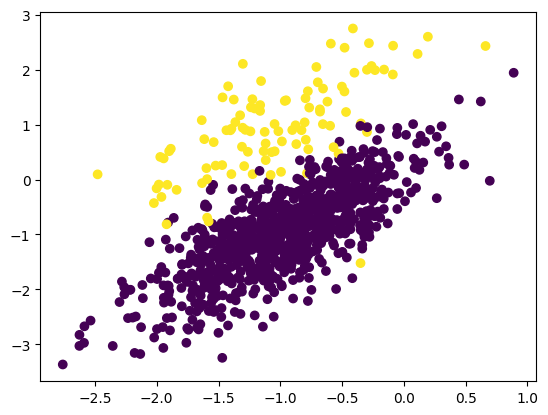

In [9]:
import matplotlib.pyplot as plt
plt.scatter(final_df['F1'],final_df['F2'],c=final_df['target'])

In [10]:
#Apply SMOTE
!pip install imblearn

In [13]:
from imblearn.over_sampling import SMOTE

#SMOTE - Connecting all the dots and probably interpolating new points

In [14]:
#transform the dataset
over_sample = SMOTE()
X,Y = over_sample.fit_resample(final_df[['F1','F2']],final_df['target'])

In [15]:
X.shape

(1800, 2)

In [16]:
Y.shape

(1800,)

In [18]:
Y==0

,target
0,True
1,True
2,True
3,False
4,True
...,...
1795,False
1796,False
1797,False
1798,False


In [19]:
Y[Y==0]

,target
0,0
1,0
2,0
4,0
5,0
...,...
995,0
996,0
997,0
998,0


In [20]:
len(Y[Y==0])

900

In [21]:
len(Y[Y==1])

900

In [22]:
df1 = pd.DataFrame(X,columns=['F1','F2'])
df2 = pd.DataFrame(Y,columns=['target'])
over_sample_df = pd.concat([df1,df2],axis=1)

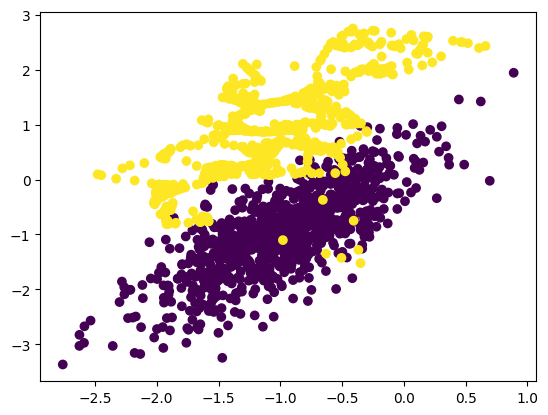

In [23]:
plt.scatter(over_sample_df['F1'],over_sample_df['F2'],c=over_sample_df['target'])